In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(1)

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

sns.set_palette("Spectral")

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

In [3]:
from FizNet import NN

Cost after iteration 0: 3.378663052191106
Cost after iteration 100: 0.10599585048954747
Cost after iteration 200: 0.045247955456397405
Cost after iteration 300: 0.02545923595454533
Cost after iteration 400: 0.016571698421417036
Cost after iteration 500: 0.011876497404078612
Cost after iteration 600: 0.009074840404681143
Cost after iteration 700: 0.007253175528603359
Cost after iteration 800: 0.00599226191056119
Cost after iteration 900: 0.0050739865439022366
Cost after iteration 1000: 0.004382203557703459
Cost after iteration 1100: 0.003843067996177192
Cost after iteration 1200: 0.003411410193155901
Cost after iteration 1300: 0.003059377468706138
Cost after iteration 1400: 0.002767353100407888
Cost after iteration 1500: 0.002522091577001816
Cost after iteration 1600: 0.002313524255985768
Cost after iteration 1700: 0.002134288555591577
Cost after iteration 1800: 0.0019789372256556934
Cost after iteration 1900: 0.0018429359777268875
Cost after iteration 2000: 0.001722899892564116
Cost af

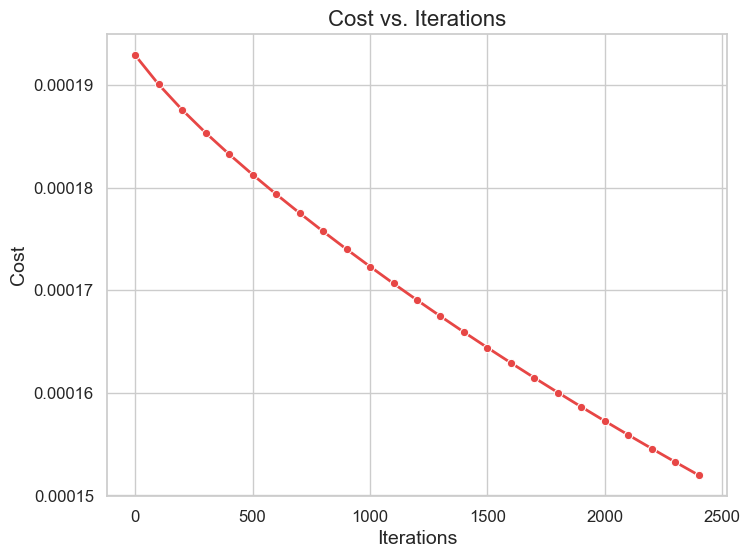

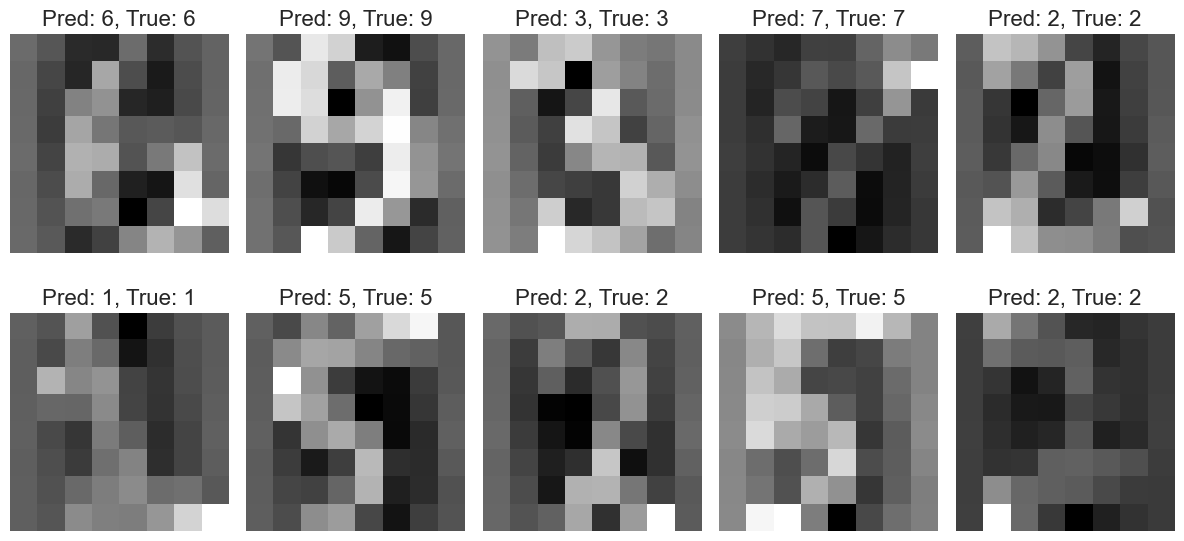

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to (n_features, n_samples) as required by the NN
X_train = X_train.T
X_test = X_test.T

# One-hot encode the labels
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y].T

y_train_one_hot = one_hot_encode(y_train, 10)
y_test_one_hot = one_hot_encode(y_test, 10)

# Define neural network architecture
input_size = X_train.shape[0]
hidden_layer1_size = 128
hidden_layer2_size = 64
num_classes = 10
layer_dims = [input_size, hidden_layer1_size, hidden_layer2_size, num_classes]

nn = NN(layer_dims)

# Perform cross-validation
kf = KFold(n_splits=5)
fold = 1
for train_index, val_index in kf.split(X_train.T):
    X_train_fold, X_val_fold = X_train[:, train_index], X_train[:, val_index]
    y_train_fold, y_val_fold = y_train_one_hot[:, train_index], y_train_one_hot[:, val_index]
    
    # Train the model
    costs = nn.train(X_train_fold, y_train_fold, num_iterations=2500, learning_rate=0.1)
    
    # Make predictions for the validation fold
    val_predictions = nn.predict(X_val_fold)
    
    # Calculate accuracy for this fold
    val_accuracy = accuracy_score(np.argmax(y_val_fold, axis=0), val_predictions)
    print(f"Fold {fold} Validation Accuracy: {val_accuracy:.4f}")
    fold += 1

# Final training on the entire training set
costs = nn.train(X_train, y_train_one_hot, num_iterations=2500, learning_rate=0.1)

# Make predictions for the test set
test_predictions = nn.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(np.argmax(y_test_one_hot, axis=0), test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(np.argmax(y_test_one_hot, axis=0), test_predictions))

# Plot the cost over iterations
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(0, 2500, 100), y=costs, marker='o', color='#e74645', linewidth=2)
plt.title('Cost vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[:, i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred: {test_predictions[i]}, True: {np.argmax(y_test_one_hot[:, i])}")
    ax.axis('off')
plt.tight_layout()
plt.show()